# Demo of 2019-nCov Data Analysis

The novel coronavirus (2019-nCov) has recently swept through China and triggered a global health emergency.  In order to better assess the situation, we need to analyze the epidemic data.  Many websites have been publishing this in real time, for example, [Ding Xiang Yuan](https://ncov.dxy.cn/ncovh5/view/pneumonia), [Tencent](https://news.qq.com/zt2020/page/feiyan.htm), [John Hopkins](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6), etc.  These websites provides timely information for the general public, but they fall short of providing sufficient data for analysis.  For example, answering any of the following simple questions will be very difficult or impossible by using the websites mentioned above:

* What is the number of confirmed cases in the past 10 days in the Hubei Province ?
* How do the daily new confirmed cases compare between the provinces of Guangdong and Zhejiang ?
* Which city have the second highest fatality rates ?  
* (And much more ...)

Therefore, a better and more convenient data set is necessary.  The [DXY-2019-nCoV-Data](https://github.com/BlankerL/DXY-2019-nCoV-Data) GitHub project  constantly snaps the real time epidemic report from  [Ding Xiang Yuan](https://ncov.dxy.cn/ncovh5/view/pneumonia), and saves it into a CSV file.  However, this CSV file is still inconvenient for general users, because different cities reports at different times, and the reporting format changes from time to time.

Therefore, this project [nCov2019_analysis](https://github.com/jianxu305/nCov2019_analysis) is created.  Its main purpose are the following:

1. Performs some essential data cleanings
2. Provides a convenient structured data for users to explore
3. Using this data set, analyze some aspects of this epidemic

Following is a demo of the basic usage:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils   # some convenient functions

%load_ext autoreload
%autoreload 2

## 1. Obtain the CSV raw data 
(some data cleaning is performed under the hood) 

In [2]:
data = utils.load_chinese_data()

最近更新于:  2020-02-11 09:42:07.368000
数据日期范围:  2020-01-24 to 2020-02-11
数据条目数:  31160


In [3]:
data.head(3)  # Check the data

,provinceName,cityName,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,updateDate
0,湖南省,长沙,912,0,213,1,219,0,39,0,2020-02-11 09:42:07.368,2020-02-11
1,湖南省,岳阳,912,0,213,1,134,0,21,1,2020-02-11 09:42:07.368,2020-02-11
2,湖南省,邵阳,912,0,213,1,91,0,22,0,2020-02-11 09:42:07.368,2020-02-11


## 2. Data Processing
### 2.1 Aggregate real time data into daily data

In [4]:
daily_frm = utils.aggDaily(data, clean_dates=True)

The following dates are removed due to insufficient provinces reported:  [datetime.date(2020, 2, 11)]


In [5]:
daily_frm.tail(3)

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate
1100,黑龙江省,鹤岗,5,1,0,2020-02-10 15:27:06.531,2020-02-10
1101,黑龙江省,黑河,4,0,0,2020-02-10 15:27:06.531,2020-02-10
1095,黑龙江省,齐齐哈尔,30,0,1,2020-02-10 15:27:06.531,2020-02-10


### 2.2 Use utils.add_dailyNew() to add daily new additions of confirmed, dead, and cured

In [6]:
daily_frm = utils.add_dailyNew(daily_frm)

In [7]:
daily_frm[daily_frm['cityName'] == '武汉'][['confirmed', 'dailyNew_confirmed', 'dead', 'dailyNew_dead', 'cured', 'dailyNew_cured', 'updateDate']][:5]

,confirmed,dailyNew_confirmed,dead,dailyNew_dead,cured,dailyNew_cured,updateDate
30372,495,NaN,23,NaN,31,NaN,2020-01-24
29197,572,77.0,38,15.0,32,1.0,2020-01-25
28548,618,46.0,45,7.0,40,8.0,2020-01-26
27369,698,80.0,63,18.0,42,2.0,2020-01-27
26565,1590,892.0,85,22.0,47,5.0,2020-01-28


### 2.3 Use utils.add_en_location() to add English (Pinyin) translations of the provinces and cities

In [8]:
daily_frm = utils.add_en_location(daily_frm)

In [9]:
daily_frm[['provinceName', 'cityName', 'provinceName_en', 'cityName_en', 'confirmed', 'dead', 'cured', 'updateDate']].head()

,provinceName,cityName,provinceName_en,cityName_en,confirmed,dead,cured,updateDate
30170,云南省,丽江市,Yunnan,Lijiang,1,0,0,2020-01-24
30168,云南省,昆明,Yunnan,Kunming,3,0,0,2020-01-24
30169,云南省,西双版纳,Yunnan,Xishuangbanna,1,0,0,2020-01-24
30514,内蒙古自治区,满洲里,Neimenggu,Manzhouli,1,0,0,2020-01-24
31042,北京市,不明地区,Beijing,Unknown,8,0,0,2020-01-24


## 3. Data Exploration

### 3.1 Slicing data

#### Use *provinceName* or *provinceName_en* to select a province by Chinese or English (Pinyin)

In [10]:
daily_frm[daily_frm['provinceName_en'] == 'Guangdong']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured,provinceName_en,cityName_en
30181,广东省,中山,2,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Zhongshan
30175,广东省,佛山,7,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Foshan
30176,广东省,广州,7,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Guangzhou
30177,广东省,惠州,5,0,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Huizhou
30173,广东省,深圳,15,2,0,2020-01-24 23:35:03.158,2020-01-24,NaN,NaN,NaN,Guangdong,Shenzhen
...,...,...,...,...,...,...,...,...,...,...,...,...
567,广东省,珠海,85,4,0,2020-02-10 21:36:08.643,2020-02-10,2.0,0.0,0.0,Guangdong,Zhuhai
575,广东省,肇庆,15,4,1,2020-02-10 21:36:08.643,2020-02-10,1.0,0.0,1.0,Guangdong,Zhaoqing
579,广东省,茂名,10,1,0,2020-02-10 21:36:08.643,2020-02-10,0.0,0.0,0.0,Guangdong,Maoming
576,广东省,阳江,13,1,0,2020-02-10 21:36:08.643,2020-02-10,0.0,0.0,0.0,Guangdong,Yangjiang


#### Use *cityName* or *cityName_en* to select a city

In [11]:
daily_frm[daily_frm['cityName'] == '武汉']

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured,provinceName_en,cityName_en
30372,湖北省,武汉,495,31,23,2020-01-24 17:30:09.978,2020-01-24,NaN,NaN,NaN,Hubei,Wuhan
29197,湖北省,武汉,572,32,38,2020-01-25 23:55:35.775,2020-01-25,77.0,15.0,1.0,Hubei,Wuhan
28548,湖北省,武汉,618,40,45,2020-01-26 13:50:35.848,2020-01-26,46.0,7.0,8.0,Hubei,Wuhan
27369,湖北省,武汉,698,42,63,2020-01-27 16:42:57.343,2020-01-27,80.0,18.0,2.0,Hubei,Wuhan
26565,湖北省,武汉,1590,47,85,2020-01-28 16:36:17.441,2020-01-28,892.0,22.0,5.0,Hubei,Wuhan
25371,湖北省,武汉,1905,54,104,2020-01-29 20:34:44.154,2020-01-29,315.0,19.0,7.0,Hubei,Wuhan
24192,湖北省,武汉,2261,54,129,2020-01-30 22:24:37.371,2020-01-30,356.0,25.0,0.0,Hubei,Wuhan
22552,湖北省,武汉,2639,103,159,2020-01-31 22:06:41.473,2020-01-31,378.0,30.0,49.0,Hubei,Wuhan
20261,湖北省,武汉,3215,106,192,2020-02-01 19:49:55.626,2020-02-01,576.0,33.0,3.0,Hubei,Wuhan
18388,湖北省,武汉,4109,175,224,2020-02-02 20:50:05.247,2020-02-02,894.0,32.0,69.0,Hubei,Wuhan


#### Use *updateDate* to obtain data for a given date

In [12]:
daily_frm[daily_frm['updateDate'] == pd.to_datetime('2020-01-27')]

,provinceName,cityName,confirmed,cured,dead,updateTime,updateDate,dailyNew_confirmed,dailyNew_dead,dailyNew_cured,provinceName_en,cityName_en
27406,上海市,嘉定区,1,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Jiadingqu
27396,上海市,外地来沪人员,23,3,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Non_Residence
27407,上海市,奉贤区,1,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Fengxian
27405,上海市,宝山区,1,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Baoshanqu
27400,上海市,徐汇区,3,0,0,2020-01-27 15:56:40.534,2020-01-27,NaN,NaN,NaN,Shanghai,Xuhuiqu
...,...,...,...,...,...,...,...,...,...,...,...,...
27899,黑龙江省,哈尔滨,8,0,0,2020-01-27 09:10:03.105,2020-01-27,0.0,0.0,0.0,Helongjiang,Ha_erbin
27900,黑龙江省,大庆,5,0,0,2020-01-27 09:10:03.105,2020-01-27,2.0,0.0,0.0,Helongjiang,Daqing
27902,黑龙江省,牡丹江,1,0,0,2020-01-27 09:10:03.105,2020-01-27,0.0,0.0,0.0,Helongjiang,Mudanjiang
27901,黑龙江省,绥化,3,0,1,2020-01-27 09:10:03.105,2020-01-27,1.0,0.0,0.0,Helongjiang,Suihua


### 3.2 Time series plotting utility: *utils.tsplot_conf_dead_cured_en()* . 
The "_en" calls the English version.  Without the "_en", the function return plots with Chinese characters

#### Time series of the total confirmed, dead, and cured, overlay with the bar plot of the daily new confirmed cases
(use *en=True* to display the labels in English)

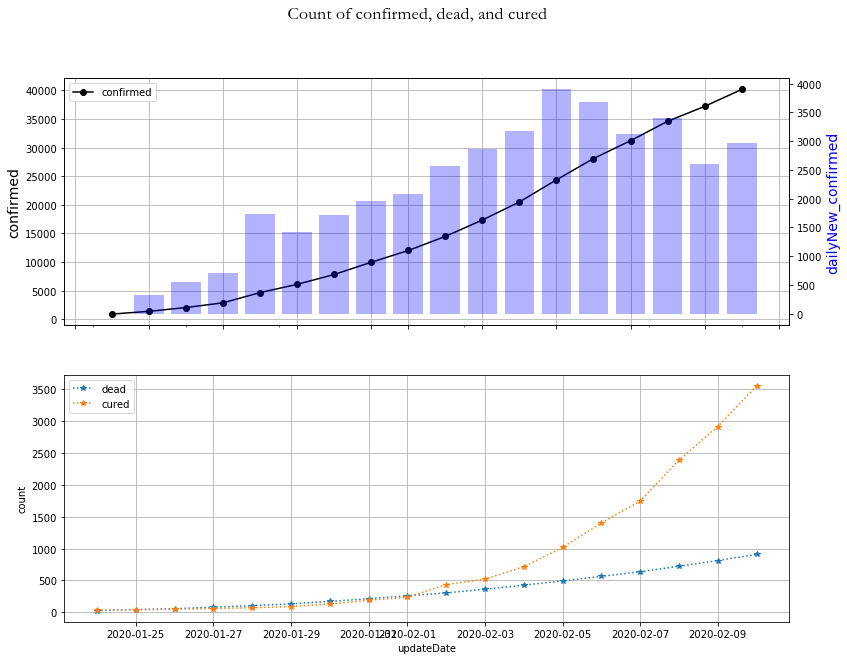

In [13]:
fig = utils.tsplot_conf_dead_cured_en(daily_frm)
plt.show()

#### It's easy to do the same time series plot for a given province.  You just need to use *provinceName* or *provinceName_en* to select the corresponding input

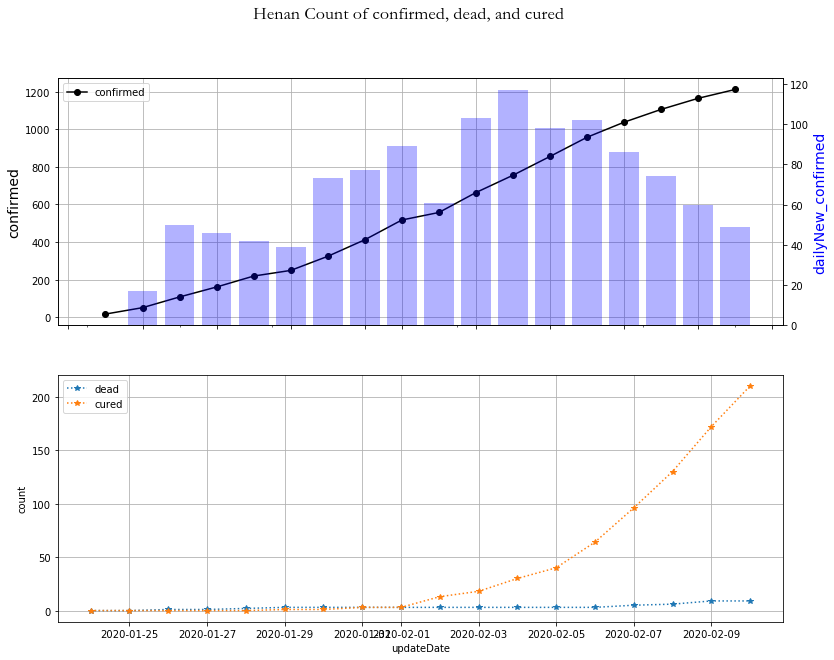

In [14]:
province = 'Henan'   
fig = utils.tsplot_conf_dead_cured_en(daily_frm[daily_frm['provinceName_en'] == province], title_prefix=province)
plt.show()                                  

#### Time series plot of a given city.  You can also use *logy=True* to plot in log scale

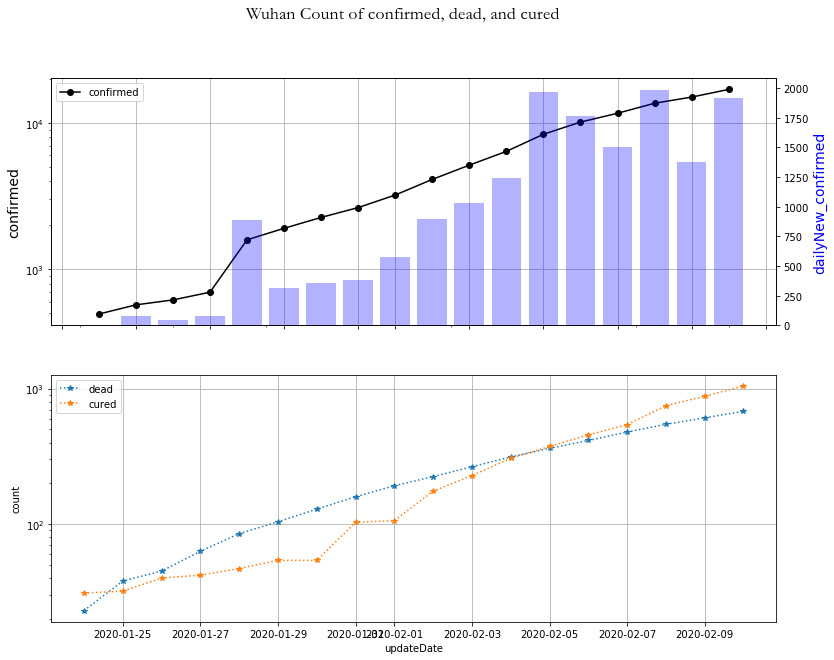

In [16]:
city = 'Wuhan'
fig = utils.tsplot_conf_dead_cured_en(daily_frm[daily_frm['cityName_en'] == city], title_prefix=city, logy=True)
plt.show()  

### 3.3 Cross-sectional Comparison using *utils.cross_sectional_bar()*

#### Comparison of the confirmed cases across all provinces on 2020-02-03

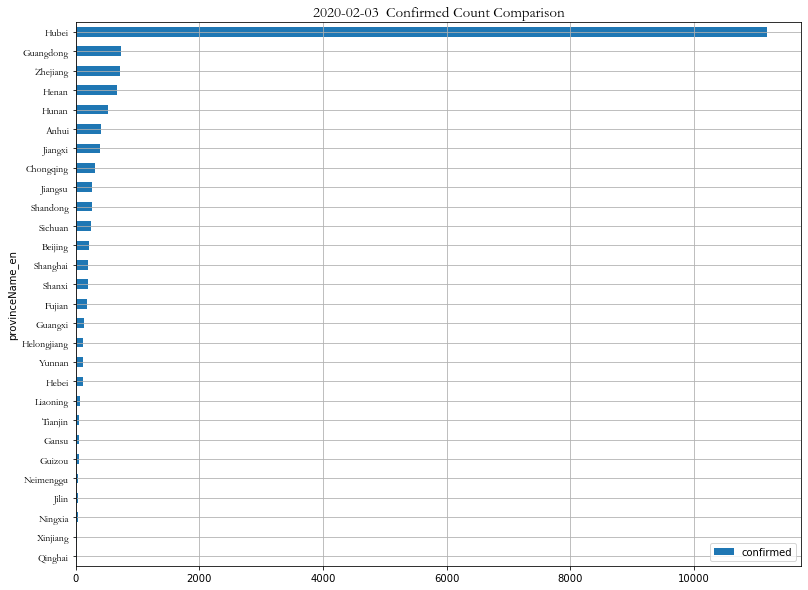

In [17]:
utils.cross_sectional_bar_en(daily_frm, '2020-02-03', col='confirmed', groupby='provinceName_en', title='Confirmed Count Comparison')

#### Death count comparison of all cities within the Hubei Province

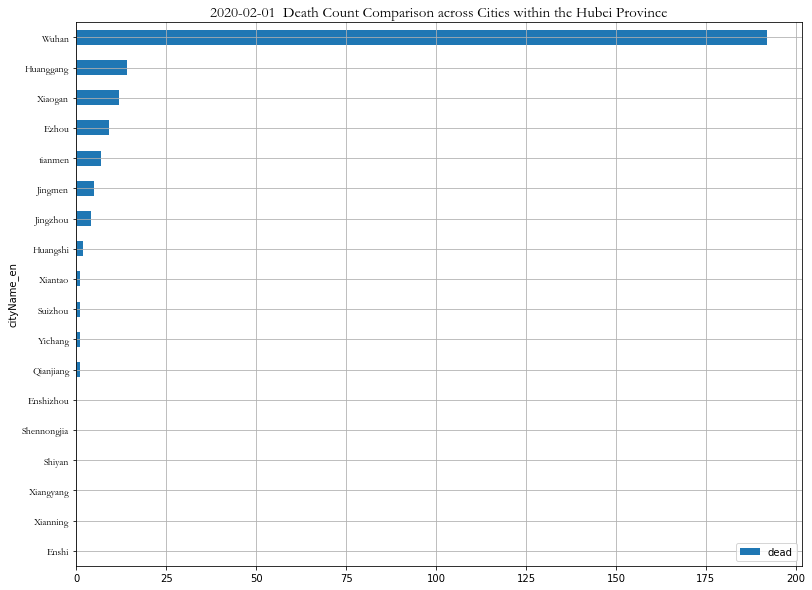

In [18]:
utils.cross_sectional_bar_en(daily_frm[daily_frm['provinceName_en'] == 'Hubei'], '2020-02-01', col='dead', 
                        groupby='cityName_en', title='Death Count Comparison across Cities within the Hubei Province')

#### Use the *largestN* parameter to limit the number of bars

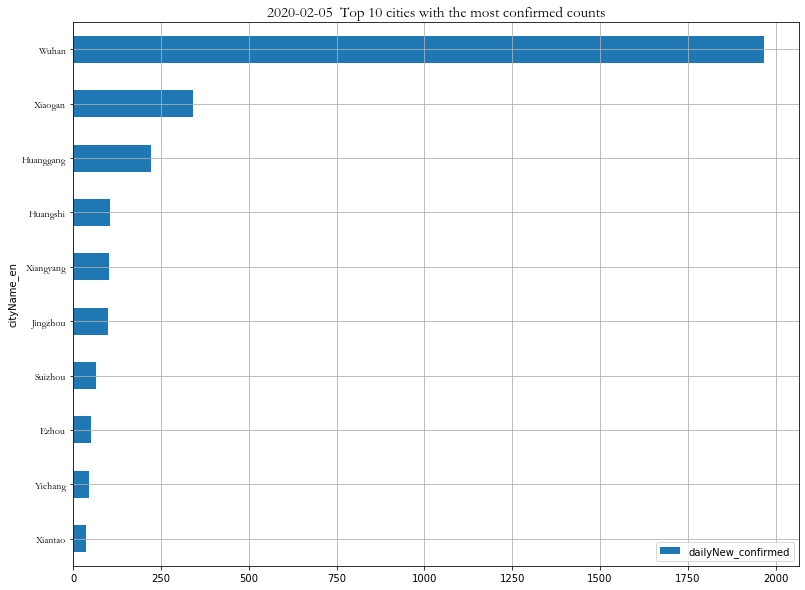

In [18]:
utils.cross_sectional_bar_en(daily_frm, '2020-02-05', col='dailyNew_confirmed', 
                        groupby='cityName_en', title='Top 10 cities with the most confirmed counts', largestN=10)